In [1]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import warnings

warnings.simplefilter("ignore")

**A random dataset returning 100 sample instances with 2 features and 100 binary labels (1 or 0). The instances are not lineary separable like the iris dataset in order to test polynomial SVM classification**

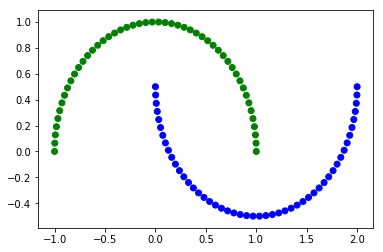

Non-linear SVM prediction:[0]
Label: 0
Confusion matrix for Linear SVC Classifier with polynomial features:
[[50  0]
 [ 0 50]]


In [2]:
moons = make_moons()
X = moons[0]
y = moons[1]


colors = ['green', 'blue']
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))
plt.show()

pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),  # Polynomial degree is usually number of features + 1?
    ("scaler", StandardScaler())
    ])

X_tr = pipeline.fit_transform(X)

classifier = LinearSVC(C=10, loss="hinge", max_iter=10000)
classifier.fit(X_tr, y)

random_index = np.random.randint(0, 100)
print(f"Non-linear SVM prediction:{classifier.predict([X_tr[random_index, ]])}")
print("Label:", y[random_index])

predictions = cross_val_predict(classifier, X_tr, y, cv=3)
conf_matrix = confusion_matrix(y, predictions)

print("Confusion matrix for Linear SVC Classifier with polynomial features:")
print(conf_matrix)

**Great result! Full 50 on the main diagonal => no false positives and no false negatives!**

**Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.**

**Using Polynomial Kernel it makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features. This trick is implemented by the SVC class**

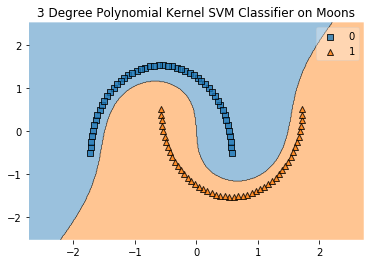

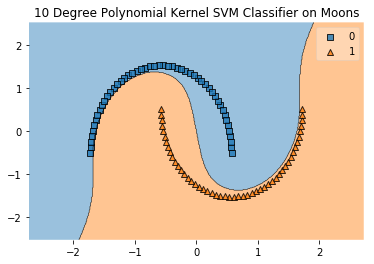

In [3]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

classifier = SVC(kernel="poly", degree=3, coef0=1, C=5)
classifier.fit(X_tr, y)

plot_decision_regions(X_tr, y, classifier)
plt.title('3 Degree Polynomial Kernel SVM Classifier on Moons')
plt.show()

classifier = SVC(kernel="poly", degree=10, coef0=1, C=5)
classifier.fit(X_tr, y)

plot_decision_regions(X_tr, y, classifier)
plt.title('10 Degree Polynomial Kernel SVM Classifier on Moons')
plt.show()

**Let's try other classifiers without the polynomial features (just the original 2) so we can plot their decision regions and compare**

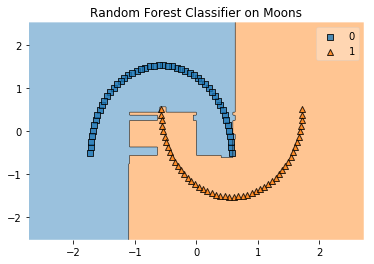

Random Forest prediction:[0]
Label:0
Confusion matrix for Random Forest Classifier
[[48  2]
 [ 1 49]]


In [4]:
classifier = RandomForestClassifier()
classifier.fit(X_tr, y)

plot_decision_regions(X_tr, y, classifier)
plt.title('Random Forest Classifier on Moons')
plt.show()

print(f"Random Forest prediction:{classifier.predict([X_tr[random_index, ]])}")
print(f"Label:{y[random_index]}")

predictions = cross_val_predict(classifier, X_tr, y, cv=3)
conf_matrix = confusion_matrix(y, predictions)

print("Confusion matrix for Random Forest Classifier")
print(conf_matrix)

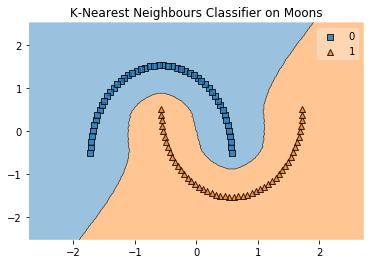

K-Nearest Neighbours prediction:[0]
Label:0
Confusion matrix for K-Nearest Neighbours
[[50  0]
 [ 0 50]]


In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_tr, y)

plot_decision_regions(X_tr, y, classifier)
plt.title('K-Nearest Neighbours Classifier on Moons')
plt.show()

print(f"K-Nearest Neighbours prediction:{classifier.predict([X_tr[random_index, ]])}")
print(f"Label:{y[random_index]}")

predictions = cross_val_predict(classifier, X_tr, y, cv=3)
conf_matrix = confusion_matrix(y, predictions)

print("Confusion matrix for K-Nearest Neighbours")
print(conf_matrix)

**Great result! Full 50 on the main diagonal => no false positives and no false negatives! Actually, from all experiments, K-Nearest Neighbours seems like the best classification algorithm but also the slowest during training...Here, not only the confusion matrix is perfect but also the decision regions show the model is nicely fitting the training set (not under/over fitting)**

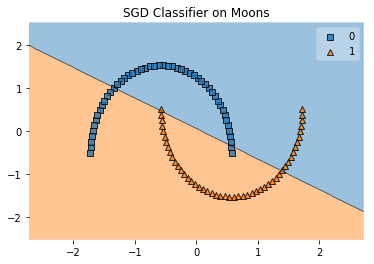

SGD prediction:[0]
Label:0
Confusion matrix for SGD Classifier
[[40 10]
 [ 6 44]]


In [6]:
classifier = SGDClassifier()
classifier.fit(X_tr, y)

plot_decision_regions(X_tr, y, classifier)
plt.title('SGD Classifier on Moons')
plt.show()

print(f"SGD prediction:{classifier.predict([X_tr[random_index, ]])}")
print(f"Label:{y[random_index]}")

predictions = cross_val_predict(classifier, X_tr, y, cv=3)
conf_matrix = confusion_matrix(y, predictions)

print("Confusion matrix for SGD Classifier")
print(conf_matrix)